In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

/home/zander/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [4]:
# read npy file
X_sol_intermediate = np.load('X_sol_intermediate.npy')

In [27]:
# read npz file
data = np.load('solution0.npz')
X_sol_intermediate = data['X_sol_intermediate']
U_sol = data['U_sol_intermediate']
inf_pr = data['info_pr']
inf_du = data['info_du']
obj = data['info_obj']

(107, 6, 21)


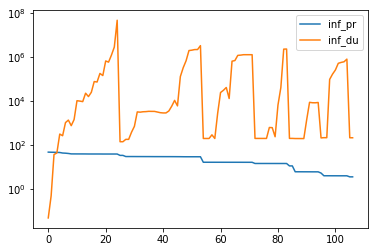

In [21]:
fig, ax = plt.subplots()

ax.plot(np.arange(len(inf_pr)), inf_pr, label="inf_pr")
ax.plot(np.arange(len(inf_du)), inf_du, label="inf_du")

ax.legend(loc="upper right")
ax.set_yscale("log")

107


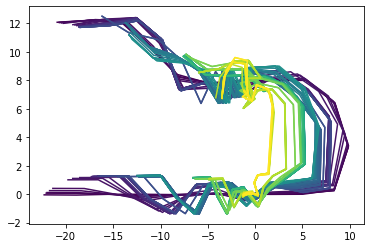

In [22]:
num_plots = len(X_sol_intermediate)
print(num_plots)

colors = cm.viridis(np.linspace(0, 1, num_plots))

for i, x in enumerate(X_sol_intermediate):
    plt.plot(x[0], x[1], color=colors[i], label=f'Plot {i+1}')
# plt.legend()

[3.15545867e-31 3.53813456e-02 6.69105780e-02 2.60269935e-01
 6.91988350e-01 6.23951337e+00 9.38062938e+00 1.89416632e+01
 4.42080842e+01 4.57563215e+01 4.59773800e+01 4.61647913e+01
 4.68838474e+01 4.88163056e+01 5.86848629e+01 5.91303245e+01
 5.97528652e+01 6.00930674e+01 6.20275154e+01 7.82792844e+01
 7.85011656e+01 7.86469572e+01 7.86915679e+01 7.88608397e+01
 7.87928532e+01 7.75122917e+01 7.75172705e+01 7.57229781e+01
 7.57094829e+01 7.56932584e+01 7.57217402e+01 7.57941674e+01
 7.55271759e+01 7.53594118e+01 7.49549114e+01 7.49419192e+01
 7.47303378e+01 7.42969125e+01 7.42137927e+01 7.41049311e+01
 7.43027241e+01 7.40323601e+01 7.39781356e+01 7.37657964e+01
 7.38366629e+01 7.45230166e+01 7.52293048e+01 7.85338814e+01
 8.17606664e+01 8.17889687e+01 8.17630547e+01 8.14933755e+01
 8.04147772e+01 7.98048500e+01 7.23688200e+01 7.22843191e+01
 7.22759297e+01 7.22490578e+01 7.21671312e+01 7.21464549e+01
 7.21254125e+01 7.18365619e+01 7.18309093e+01 7.17122866e+01
 7.16838059e+01 7.161901

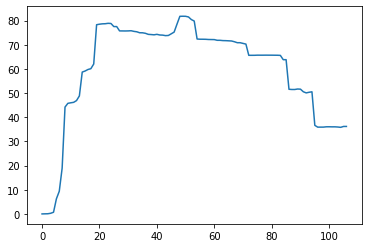

In [26]:
print(obj)
plt.plot(obj)

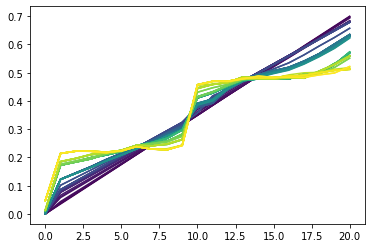

In [23]:
for i, x in enumerate(X_sol_intermediate):
    plt.plot(x[5], color=colors[i], label=f'Plot {i+1}')

In [6]:
# read npz file
data = np.load('solution.npz')
X_sol_intermediate = data['X_sol_intermediate']
U_sol = data['U_sol_intermediate']
inf_pr = data['info_pr']
inf_du = data['info_du']
obj = data['info_obj']

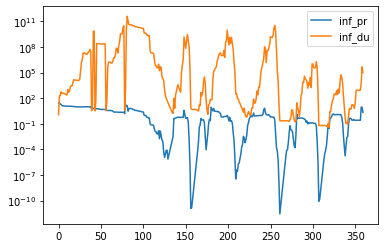

In [7]:
fig, ax = plt.subplots()

ax.plot(np.arange(len(inf_pr)), inf_pr, label="inf_pr")
ax.plot(np.arange(len(inf_du)), inf_du, label="inf_du")

ax.legend(loc="upper right")
ax.set_yscale("log")

360


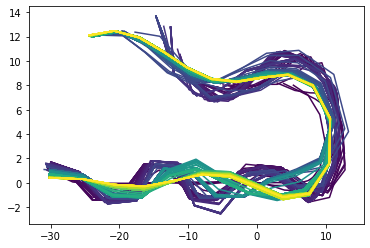

In [8]:
num_plots = len(X_sol_intermediate)
print(num_plots)

colors = cm.viridis(np.linspace(0, 1, num_plots))

for i, x in enumerate(X_sol_intermediate):
    plt.plot(x[0], x[1], color=colors[i], label=f'Plot {i+1}')
# plt.legend()

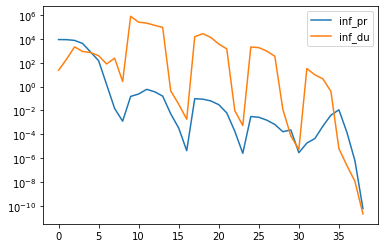

39


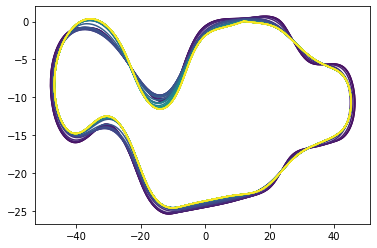

In [2]:
# read npz file
data = np.load('solution_circles.npz')
X_sol_intermediate = data['X_sol_intermediate']
U_sol = data['U_sol_intermediate']
inf_pr = data['info_pr']
inf_du = data['info_du']
obj = data['info_obj']

fig, ax = plt.subplots()

ax.plot(np.arange(len(inf_pr)), inf_pr, label="inf_pr")
ax.plot(np.arange(len(inf_du)), inf_du, label="inf_du")

ax.legend(loc="upper right")
ax.set_yscale("log")
plt.show()

num_plots = len(X_sol_intermediate)
print(num_plots)

colors = cm.viridis(np.linspace(0, 1, num_plots))

for i, x in enumerate(X_sol_intermediate):
    plt.plot(x[0], x[1], color=colors[i], label=f'Plot {i+1}')
# plt.legend()
plt.show()

In [3]:
last_sol = X_sol_intermediate[-1]
last_sol = last_sol[:2, :].T
print(last_sol)

# Save last solution to yaml file with structure of ros path message
import yaml
from nav_msgs.msg import Path
from geometry_msgs.msg import PoseStamped, Point

all_poses = []

# Iterate over path poses and create YAML entries
for pose in last_sol:
    print(pose)
    x_coord = float(pose[0])
    print(x_coord)
    y_coord = float(pose[1])
    pose_entry = {
        "header": {
            "frame_id": "ugr/map",
            "seq": 0,
            "stamp": {"nsecs": 0, "secs": 0},
        },
        "pose": {
            "position": {"x": x_coord, "y": y_coord, "z": 0},
            "orientation": {"x": 0, "y": 0, "z": 0, "w": 1},
        },
    }
    all_poses.append(pose_entry)

# Create the final YAML data structure
data = {
    "header": {
        "frame_id": "ugr/map",
        "seq": 0,
        "stamp": {"nsecs": 0, "secs": 0},
    },
    "poses": all_poses,
}

with open('fsi_raceline_mpcc_circles.yaml', 'w') as file:
    yaml.dump(data, file)


[[ 1.20406243e+01  3.16571704e-02]
 [ 1.25397785e+01  2.59563751e-03]
 [ 1.30390571e+01 -2.42470716e-02]
 [ 1.35384258e+01 -4.93606637e-02]
 [ 1.40378586e+01 -7.31690119e-02]
 [ 1.45373338e+01 -9.60698382e-02]
 [ 1.50368319e+01 -1.18468364e-01]
 [ 1.55363326e+01 -1.40806205e-01]
 [ 1.60358134e+01 -1.63585975e-01]
 [ 1.65352462e+01 -1.87391524e-01]
 [ 1.70345946e+01 -2.12903232e-01]
 [ 1.75338090e+01 -2.40907479e-01]
 [ 1.80328214e+01 -2.72299098e-01]
 [ 1.85315378e+01 -3.08075537e-01]
 [ 1.90298306e+01 -3.49321363e-01]
 [ 1.95275303e+01 -3.97181977e-01]
 [ 2.00244185e+01 -4.52825746e-01]
 [ 2.05202242e+01 -5.17394600e-01]
 [ 2.10146258e+01 -5.91944245e-01]
 [ 2.15072620e+01 -6.77376961e-01]
 [ 2.19977514e+01 -7.74372175e-01]
 [ 2.24857237e+01 -8.83322988e-01]
 [ 2.29708570e+01 -1.00429024e+00]
 [ 2.34529145e+01 -1.13698855e+00]
 [ 2.39317717e+01 -1.28081223e+00]
 [ 2.44074307e+01 -1.43488962e+00]
 [ 2.48800185e+01 -1.59814957e+00]
 [ 2.53497761e+01 -1.76938832e+00]
 [ 2.58170377e+01 -1

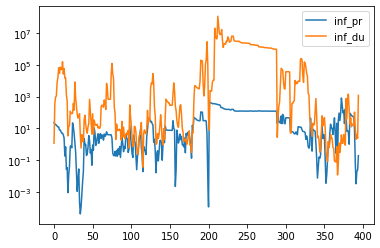

395


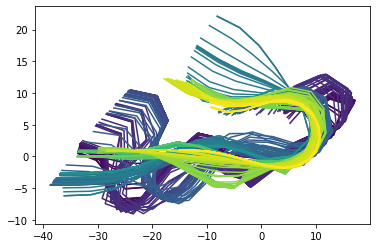

In [4]:
# read npz file
data = np.load('solution_halfspaces.npz')
X_sol_intermediate = data['X_sol_intermediate']
U_sol = data['U_sol_intermediate']
inf_pr = data['info_pr']
inf_du = data['info_du']
obj = data['info_obj']

fig, ax = plt.subplots()

ax.plot(np.arange(len(inf_pr)), inf_pr, label="inf_pr")
ax.plot(np.arange(len(inf_du)), inf_du, label="inf_du")

ax.legend(loc="upper right")
ax.set_yscale("log")
plt.show()

num_plots = len(X_sol_intermediate)
print(num_plots)

colors = cm.viridis(np.linspace(0, 1, num_plots))

for i, x in enumerate(X_sol_intermediate):
    plt.plot(x[0], x[1], color=colors[i], label=f'Plot {i+1}')
# plt.legend()
plt.show()

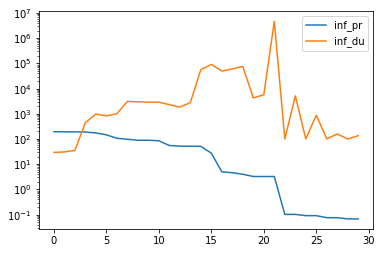

30


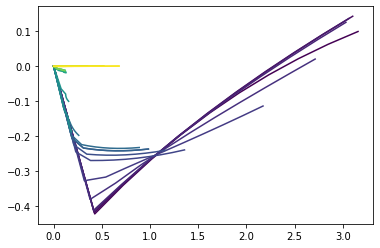

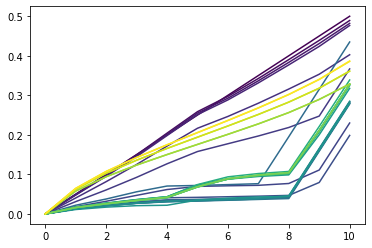

In [104]:
# read npz file
data = np.load('solution.npz')
X_sol_intermediate = data['X_sol_intermediate']
U_sol = data['U_sol_intermediate']
inf_pr = data['info_pr']
inf_du = data['info_du']
obj = data['info_obj']
# exec_times = data['exec_times']

fig, ax = plt.subplots()

ax.plot(np.arange(len(inf_pr)), inf_pr, label="inf_pr")
ax.plot(np.arange(len(inf_du)), inf_du, label="inf_du")

ax.legend(loc="upper right")
ax.set_yscale("log")
plt.show()

num_plots = len(X_sol_intermediate)
print(num_plots)

colors = cm.viridis(np.linspace(0, 1, num_plots))
# temp_colors = cm.viridis(np.linspace(0, 1, 10))
for i, x in enumerate(X_sol_intermediate[:]):
    plt.plot(x[0], x[1], color=colors[i], label=f'Plot {i+1}')
    
# plt.legend()
plt.show()

for i, x in enumerate(X_sol_intermediate):
    plt.plot(x[5], color=colors[i], label=f'Plot {i+1}')
plt.show()

[10.00000008 10.00000007 10.00000007 10.00000007 10.00000007 10.00000007
 10.00000007  9.99905746  9.99292273  9.98045003  9.96168249  9.9371205
  9.90743916  9.87338128  9.83571337  9.79520983  9.75264286  9.70877867
  9.66437     9.62014825  9.57680301  9.53493925  9.49496849  9.4569918
  9.42086902  9.38636964  9.35323628  9.32121842  9.29011574  9.25986939]


(8.0, 12.0)

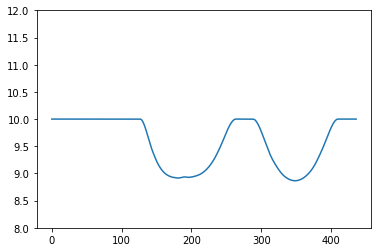

In [5]:
# print(X_sol_intermediate[0, 4, :])
print(X_sol_intermediate[-1, 4, 120:150])
# print(U_sol[:, 2, :])
plt.plot(X_sol_intermediate[-1, 4, :])
plt.ylim(8, 12)

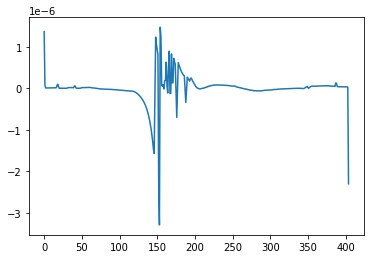

In [39]:
plt.plot(U_sol[-1, 0, :])

[0.45700593 0.1003495  0.14555478 0.05306562 0.05208625 0.05540006
 0.0761316  0.06009779 0.0502729  0.06777424 0.07753953 0.07074387
 0.08350635 0.08634044 0.08918486 0.08836044 0.08521005 0.07740471
 0.0755674  0.08154423 0.072035   0.07729416 0.07580156 0.07175171
 0.07769521 0.06932138 0.07646745 0.07530716 0.07984545 0.08755217
 0.07068821 0.07126347 0.07790818 0.07964775 0.07481819 0.07425319
 0.07824668 0.07485824 0.06771545 0.07945397 0.06809728 0.07444486
 0.08214422 0.08874878 0.07208856 0.07183152 0.07989057 0.10991094]


(0.0, 0.2)

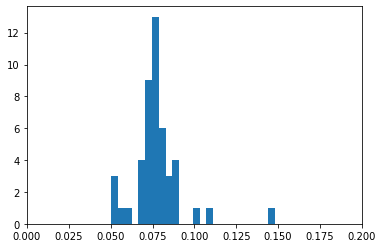

In [24]:
print(exec_times)
# plt.plot(exec_times)
plt.hist(exec_times, bins=100)
plt.xlim(0, 0.2)

1


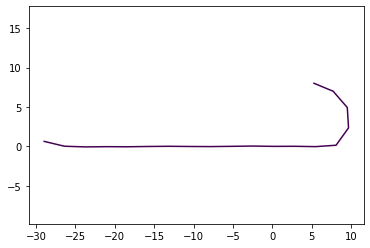

In [100]:
# read npz file
data = np.load('solution_halfspaces.npz')
X_sol_intermediate = data['X_sol_intermediate']
U_sol = data['U_sol_intermediate']
inf_pr = data['info_pr']
inf_du = data['info_du']
obj = data['info_obj']
# path_blf = data['path_blf']



# # plt.plot(path_blf[:, 0], path_blf[:, 1], 'b')
# # exec_times = data['exec_times']
# closest_index = np.argmin(np.sum((path_blf - [0, 0]) ** 2, axis=1))

# path_blf = np.roll(path_blf, -closest_index, axis=0)

# fig, ax = plt.subplots()

# ax.plot(np.arange(len(inf_pr)), inf_pr, label="inf_pr")
# ax.plot(np.arange(len(inf_du)), inf_du, label="inf_du")

# ax.legend(loc="upper right")
# ax.set_yscale("log")
# plt.show()

num_plots = len(X_sol_intermediate)
num_plots = 1
print(num_plots)

colors = cm.viridis(np.linspace(0, 1, num_plots))
# temp_colors = cm.viridis(np.linspace(0, 1, 10))
for i, x in enumerate(X_sol_intermediate[:]):
    plt.plot(x[0], x[1], color=colors[i], label=f'Plot {i+1}')
    break

# plt.plot(path_blf[:30, 0], path_blf[:30, 1], 'r')
# print(path_blf[:30, 1])
ax = plt.gca()
ax.set_aspect("equal", "datalim")
    
# plt.legend()
plt.show()

plt.show()

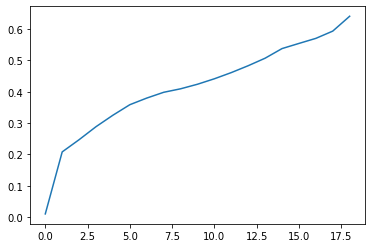

In [101]:
plt.plot(X_sol_intermediate[-1, 5, :])

Text(0, 0.5, 'Steering rate (rad/s)')

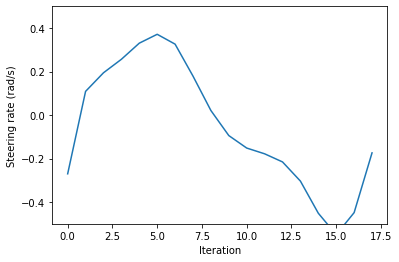

In [102]:
plt.plot(U_sol[-1, 1, :])
plt.ylim(-0.5, 0.5)
plt.xlabel("Iteration")
plt.ylabel("Steering rate (rad/s)")

(8.0, 12.0)

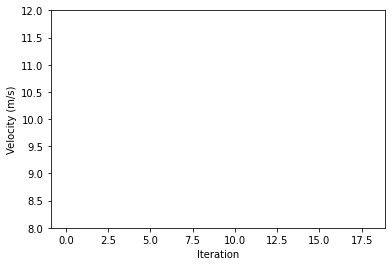

In [103]:
plt.rcParams['text.usetex'] = False
plt.plot(X_sol_intermediate[-1, 4, :])
plt.xlabel('Iteration')
plt.ylabel("Velocity (m/s)")
plt.ylim(8, 12)